# 5.0 Data Visualizations (Plotly and Animation)

Visualizing pose data using plotly (not maplotlib)

In [122]:
import plotly.graph_objects as go
import scipy.interpolate as interp
import pandas as pd
import numpy as np

In [174]:
tricks = pd.read_csv('data/internal/tricks/pose_data.csv')
upright = pd.read_csv('data/ground_truth/processed/upright/pose_data.csv')

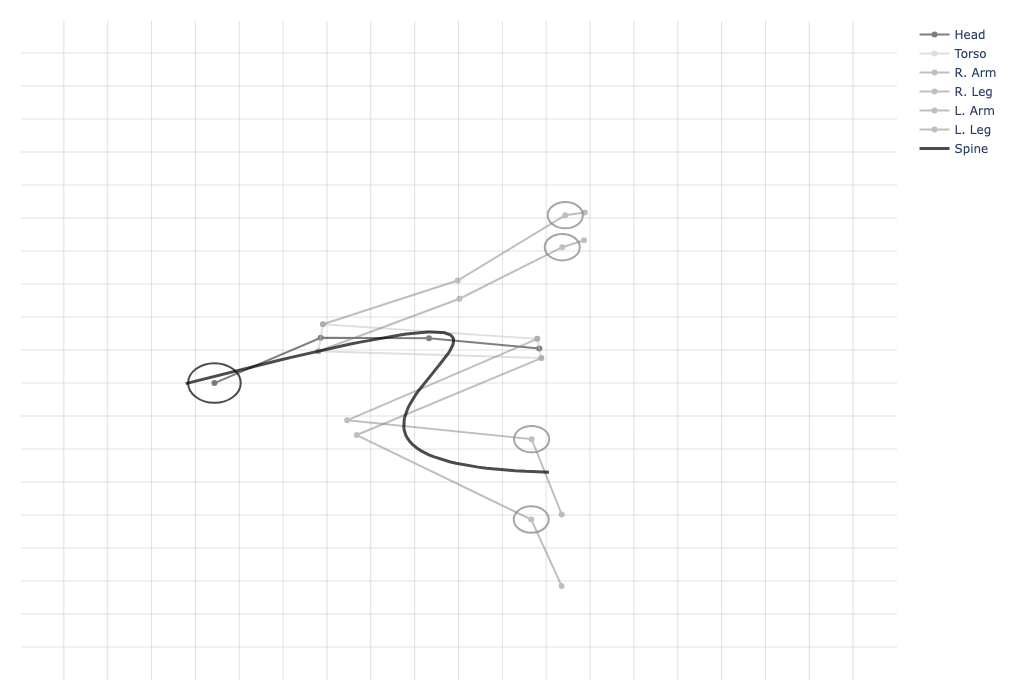

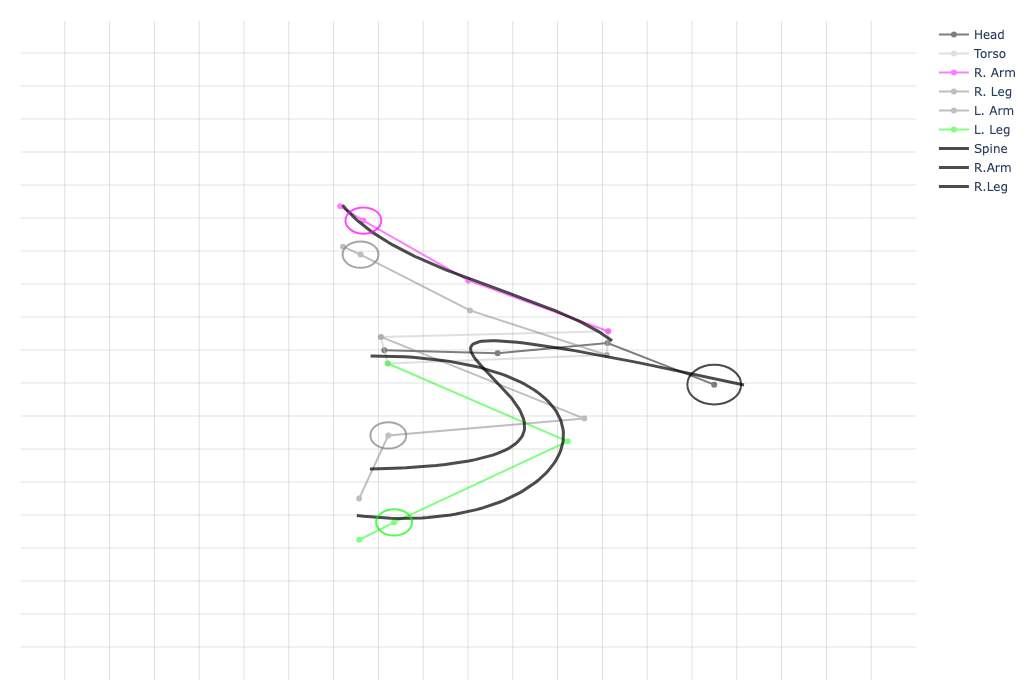

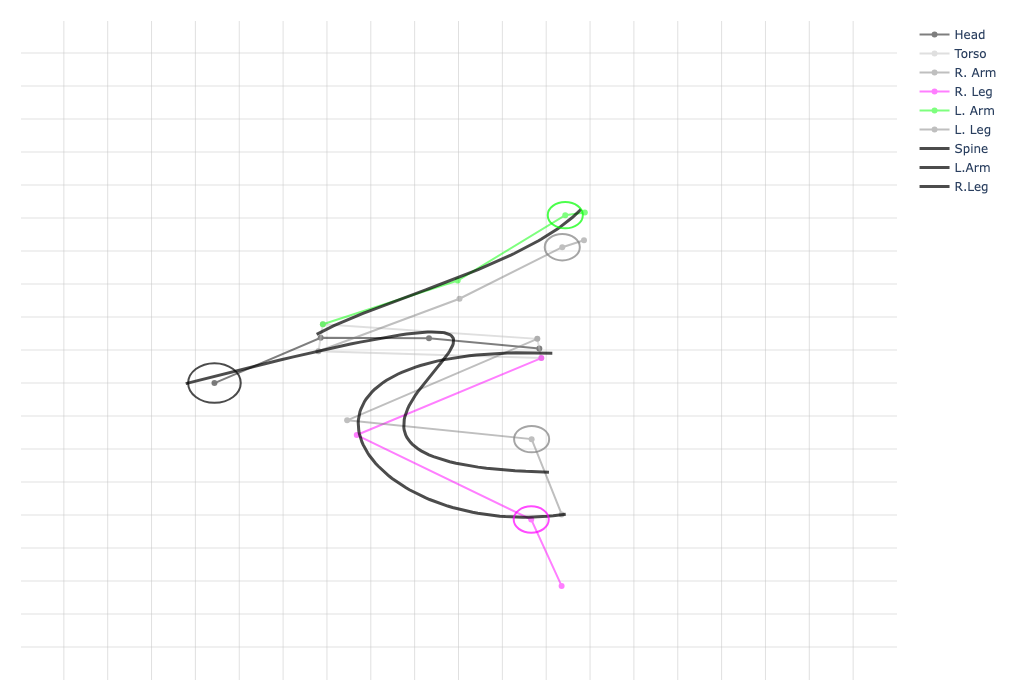

In [339]:
def smooth_line(x, y, s=0.5, k=3):
    if len(x) < 4:
        raise ValueError("At least four points are required to use spline interpolation.")
    tck, u = interp.splprep([x, y], s=s, k=k)
    unew = np.linspace(0, 1.00, 100)
    out = interp.splev(unew, tck)
    return out[0], out[1]

def plotly_pose_figure(data, idx, spine=True, right_arm=False, left_arm=False, right_leg=False, left_leg=False):
    row = data.iloc[idx]
    fig = go.Figure()

    trend_color = 'black'
    Scolor  = 'black' if spine else 'gray'
    RAcolor = 'magenta' if right_arm else 'gray'
    LAcolor = 'lime' if left_arm else 'gray'
    RLcolor = 'magenta' if right_leg else 'gray'
    LLcolor = 'lime' if left_leg else 'gray'

    knees_x = (row['landmark_25_x'] + row['landmark_26_x'])/2
    knees_y = (row['landmark_25_y'] + row['landmark_26_y'])/2
    feet_x = (row['landmark_30_x'] + row['landmark_29_x'])/2
    feet_y = (row['landmark_30_y'] + row['landmark_29_y'])/2

    Sx = [row['head_x'], row['chest_x'], row['stomach_x'], row['hip_x']]
    Sy = [row['head_y'], row['chest_y'], row['stomach_y'], row['hip_y']]
    Tx = [row['landmark_11_x'], row['landmark_12_x'], row['landmark_24_x'],row['landmark_23_x'],row['landmark_11_x']]
    Ty = [row['landmark_11_y'], row['landmark_12_y'], row['landmark_24_y'],row['landmark_23_y'],row['landmark_11_y']]
    RAx = [row['landmark_12_x'], row['landmark_14_x'], row['landmark_16_x'], row['knuckles_right_x']]
    RAy = [row['landmark_12_y'], row['landmark_14_y'], row['landmark_16_y'], row['knuckles_right_y']]  
    LAx = [row['landmark_11_x'], row['landmark_13_x'], row['landmark_15_x'], row['knuckles_left_x']]
    LAy = [row['landmark_11_y'], row['landmark_13_y'], row['landmark_15_y'], row['knuckles_left_y']]  
    RLx = [row['landmark_24_x'], row['landmark_26_x'], row['landmark_28_x'],row['landmark_32_x']]
    RLy = [row['landmark_24_y'], row['landmark_26_y'], row['landmark_28_y'],row['landmark_32_y']]
    LLx = [row['landmark_23_x'], row['landmark_25_x'], row['landmark_27_x'],row['landmark_31_x']]
    LLy = [row['landmark_23_y'], row['landmark_25_y'], row['landmark_27_y'],row['landmark_31_y']]
    
    fig.add_trace(go.Scatter(x=Sx, y=Sy, mode='lines+markers', line=dict(color=Scolor, width=2),opacity=0.5, name='Head'))
    fig.add_trace(go.Scatter(x=Tx, y=Ty, mode='lines+markers', line=dict(color='silver', width=2),opacity=0.5, name='Torso'))
    fig.add_trace(go.Scatter(x=RAx, y=RAy, mode='lines+markers', line=dict(color=RAcolor, width=2),opacity=0.5, name='R. Arm'))
    fig.add_trace(go.Scatter(x=RLx, y=RLy, mode='lines+markers', line=dict(color=RLcolor, width=2),opacity=0.5, name='R. Leg'))
    fig.add_trace(go.Scatter(x=LAx, y=LAy, mode='lines+markers', line=dict(color=LAcolor, width=2),opacity=0.5, name='L. Arm'))
    fig.add_trace(go.Scatter(x=LLx, y=LLy, mode='lines+markers', line=dict(color=LLcolor, width=2),opacity=0.5, name='L. Leg'))
 
    fig.add_shape(type="circle", xref="x", yref="y", x0=row['head_x'] - 0.03, y0=row['head_y'] - 0.03,  x1=row['head_x'] + 0.03, y1=row['head_y'] + 0.03, line_color=Scolor, opacity=0.7)
    fig.add_shape(type="circle", xref="x", yref="y", x0=row['landmark_16_x'] - 0.02, y0=row['landmark_16_y'] - 0.02,  x1=row['landmark_16_x'] + 0.02, y1=row['landmark_16_y'] + 0.02, line_color=RAcolor, opacity=0.7)
    fig.add_shape(type="circle", xref="x", yref="y", x0=row['landmark_15_x'] - 0.02, y0=row['landmark_15_y'] - 0.02,  x1=row['landmark_15_x'] + 0.02, y1=row['landmark_15_y'] + 0.02, line_color=LAcolor, opacity=0.7)
    fig.add_shape(type="circle", xref="x", yref="y", x0=row['landmark_28_x'] - 0.02, y0=row['landmark_28_y'] - 0.02,  x1=row['landmark_28_x'] + 0.02, y1=row['landmark_28_y'] + 0.02, line_color=RLcolor, opacity=0.7)
    fig.add_shape(type="circle", xref="x", yref="y", x0=row['landmark_27_x'] - 0.02, y0=row['landmark_27_y'] - 0.02,  x1=row['landmark_27_x'] + 0.02, y1=row['landmark_27_y'] + 0.02, line_color=LLcolor, opacity=0.7)


    if spine:
        Sx_trend = [row['head_x'], row['chest_x'], row['stomach_x'], row['hip_x'], knees_x, feet_x]
        Sy_trend = [row['head_y'], row['chest_y'], row['stomach_y'], row['hip_y'], knees_y, feet_y]
        smooth_Sx, smooth_Sy = smooth_line(Sx_trend, Sy_trend)
        fig.add_trace(go.Scatter(x=smooth_Sx, y=smooth_Sy, mode='lines', line=dict(color=trend_color, width=3),opacity=0.7, name='Spine'))

    if right_arm:
        RAx_trend = [row['chest_x'],row['landmark_12_x'], row['landmark_14_x'], row['landmark_16_x'], row['knuckles_right_x']]
        RAy_trend = [row['chest_y'],row['landmark_12_y'], row['landmark_14_y'], row['landmark_16_y'], row['knuckles_right_y']]
        smooth_RAx, smooth_RAy = smooth_line(RAx_trend, RAy_trend) 
        fig.add_trace(go.Scatter(x=smooth_RAx, y=smooth_RAy, mode='lines', line=dict(color=trend_color, width=3),opacity=0.7, name='R.Arm'))

    if left_arm:
        LAx_trend = [row['chest_x'],row['landmark_11_x'], row['landmark_13_x'], row['landmark_15_x'], row['knuckles_left_x']]
        LAy_trend = [row['chest_y'],row['landmark_11_y'], row['landmark_13_y'], row['landmark_15_y'], row['knuckles_left_y']]
        smooth_LAx, smooth_LAy = smooth_line(LAx_trend, LAy_trend)
        fig.add_trace(go.Scatter(x=smooth_LAx, y=smooth_LAy, mode='lines', line=dict(color=trend_color, width=3),opacity=0.7, name='L.Arm'))

    if right_leg:
        RLx_trend = [row['hip_x'], row['landmark_24_x'], row['landmark_26_x'], row['landmark_28_x'], row['landmark_30_x']]
        RLy_trend = [row['hip_y'], row['landmark_24_y'], row['landmark_26_y'], row['landmark_28_y'], row['landmark_30_y']]
        smooth_RLx, smooth_RLy = smooth_line(RLx_trend, RLy_trend) 
        fig.add_trace(go.Scatter(x=smooth_RLx, y=smooth_RLy, mode='lines', line=dict(color=trend_color, width=3),opacity=0.7, name='R.Leg'))
        
    if left_leg:
        LLx_trend = [row['hip_x'],row['landmark_23_x'], row['landmark_25_x'], row['landmark_27_x'], row['landmark_29_x']]
        LLy_trend = [row['hip_y'],row['landmark_23_y'], row['landmark_25_y'], row['landmark_27_y'], row['landmark_29_y']]
        smooth_LLx, smooth_LLy = smooth_line(LLx_trend, LLy_trend) 
        fig.add_trace(go.Scatter(x=smooth_LLx, y=smooth_LLy, mode='lines', line=dict(color=trend_color, width=3),opacity=0.7, name='R.Leg'))

    fig.update_xaxes(range=[0, 1], showgrid=True, gridwidth=0.5, gridcolor='silver', tickvals=np.arange(0, 1.05, 0.05), ticktext=['']*21)
    fig.update_yaxes(range=[1, 0], showgrid=True, gridwidth=0.5, gridcolor='silver', tickvals=np.arange(0, 1.05, 0.05), ticktext=['']*21)
    fig.update_layout(width=700, height=700, margin=dict(l=20, r=20, t=20, b=20), plot_bgcolor='white')
    fig.update_layout(showlegend=True)
    fig.show()

plotly_pose_figure(data=tricks,idx=515)
plotly_pose_figure(data=tricks,idx=514, right_arm=True, left_leg=True)
plotly_pose_figure(data=tricks,idx=515, left_arm=True, right_leg=True)

## Animation

In [204]:
def plotly_dynamic_pose_figure(data, spine=True, right_arm=False, left_arm=False, right_leg=False, left_leg=False):

    trend_color = 'black'
    Scolor = 'black' if spine else 'gray'
    RAcolor = 'magenta' if right_arm else 'gray'
    LAcolor = 'lime' if left_arm else 'gray'
    RLcolor = 'magenta' if right_leg else 'gray'
    LLcolor = 'lime' if left_leg else 'gray'

    frames = []
    
    for i in range(len(data)):  # Adjust range based on your data
        row = data.iloc[i]
        knees_x = (row['landmark_25_x'] + row['landmark_26_x'])/2
        knees_y = (row['landmark_25_y'] + row['landmark_26_y'])/2
        feet_x = (row['landmark_30_x'] + row['landmark_29_x'])/2
        feet_y = (row['landmark_30_y'] + row['landmark_29_y'])/2
    
        Sx = [row['head_x'], row['chest_x'], row['stomach_x'], row['hip_x']]
        Sy = [row['head_y'], row['chest_y'], row['stomach_y'], row['hip_y']]
        Tx = [row['landmark_11_x'], row['landmark_12_x'], row['landmark_24_x'],row['landmark_23_x'],row['landmark_11_x']]
        Ty = [row['landmark_11_y'], row['landmark_12_y'], row['landmark_24_y'],row['landmark_23_y'],row['landmark_11_y']]
        RAx = [row['landmark_12_x'], row['landmark_14_x'], row['landmark_16_x'], row['knuckles_right_x']]
        RAy = [row['landmark_12_y'], row['landmark_14_y'], row['landmark_16_y'], row['knuckles_right_y']]  
        LAx = [row['landmark_11_x'], row['landmark_13_x'], row['landmark_15_x'], row['knuckles_left_x']]
        LAy = [row['landmark_11_y'], row['landmark_13_y'], row['landmark_15_y'], row['knuckles_left_y']]  
        RLx = [row['landmark_24_x'], row['landmark_26_x'], row['landmark_28_x'],row['landmark_32_x']]
        RLy = [row['landmark_24_y'], row['landmark_26_y'], row['landmark_28_y'],row['landmark_32_y']]
        LLx = [row['landmark_23_x'], row['landmark_25_x'], row['landmark_27_x'],row['landmark_31_x']]
        LLy = [row['landmark_23_y'], row['landmark_25_y'], row['landmark_27_y'],row['landmark_31_y']]

        frame_traces = [
            go.Scatter(x=Sx, y=Sy, mode='lines+markers', line=dict(color=Scolor, width=2), opacity=0.5, name='Head'),
            go.Scatter(x=Tx, y=Ty, mode='lines+markers', line=dict(color='silver', width=2), opacity=0.5, name='Torso'),
            go.Scatter(x=RAx, y=RAy, mode='lines+markers', line=dict(color=RAcolor, width=2), opacity=0.5, name='R.Arm'),
            go.Scatter(x=LAx, y=LAy, mode='lines+markers', line=dict(color=LAcolor, width=2), opacity=0.5, name='L.Arm'),
            go.Scatter(x=RLx, y=RLy, mode='lines+markers', line=dict(color=RLcolor, width=2), opacity=0.5, name='R.Leg'),
            go.Scatter(x=LLx, y=LLy, mode='lines+markers', line=dict(color=LLcolor, width=2), opacity=0.5, name='L.Leg'),
        ]

        if spine:
            Sx_trend = [row['head_x'], row['chest_x'], row['stomach_x'], row['hip_x'], knees_x, feet_x]
            Sy_trend = [row['head_y'], row['chest_y'], row['stomach_y'], row['hip_y'], knees_y, feet_y]
            smooth_Sx, smooth_Sy = smooth_line(Sx_trend, Sy_trend)
            frame_traces.append(go.Scatter(x=smooth_Sx, y=smooth_Sy, mode='lines', line=dict(color=trend_color, width=3),opacity=0.7, name='Spine'))
    
        if right_arm:
            RAx_trend = [row['chest_x'],row['landmark_12_x'], row['landmark_14_x'], row['landmark_16_x'], row['knuckles_right_x']]
            RAy_trend = [row['chest_y'],row['landmark_12_y'], row['landmark_14_y'], row['landmark_16_y'], row['knuckles_right_y']]
            smooth_RAx, smooth_RAy = smooth_line(RAx_trend, RAy_trend) 
            frame_traces.append(go.Scatter(x=smooth_RAx, y=smooth_RAy, mode='lines', line=dict(color=trend_color, width=3),opacity=0.7, name='R.Arm'))
    
        if left_arm:
            LAx_trend = [row['chest_x'],row['landmark_11_x'], row['landmark_13_x'], row['landmark_15_x'], row['knuckles_left_x']]
            LAy_trend = [row['chest_y'],row['landmark_11_y'], row['landmark_13_y'], row['landmark_15_y'], row['knuckles_left_y']]
            smooth_LAx, smooth_LAy = smooth_line(LAx_trend, LAy_trend)
            frame_traces.append(go.Scatter(x=smooth_LAx, y=smooth_LAy, mode='lines', line=dict(color=trend_color, width=3),opacity=0.7, name='L.Arm'))
    
        if right_leg:
            RLx_trend = [row['hip_x'], row['landmark_24_x'], row['landmark_26_x'], row['landmark_28_x'], row['landmark_30_x']]
            RLy_trend = [row['hip_y'], row['landmark_24_y'], row['landmark_26_y'], row['landmark_28_y'], row['landmark_30_y']]
            smooth_RLx, smooth_RLy = smooth_line(RLx_trend, RLy_trend) 
            frame_traces.append(go.Scatter(x=smooth_RLx, y=smooth_RLy, mode='lines', line=dict(color=trend_color, width=3),opacity=0.7, name='R.Leg'))
            
        if left_leg:
            LLx_trend = [row['hip_x'],row['landmark_23_x'], row['landmark_25_x'], row['landmark_27_x'], row['landmark_29_x']]
            LLy_trend = [row['hip_y'],row['landmark_23_y'], row['landmark_25_y'], row['landmark_27_y'], row['landmark_29_y']]
            smooth_LLx, smooth_LLy = smooth_line(LLx_trend, LLy_trend) 
            frame_traces.append(go.Scatter(x=smooth_LLx, y=smooth_LLy, mode='lines', line=dict(color=trend_color, width=3),opacity=0.7, name='R.Leg'))

        frame_shapes = [
            dict(type="circle", xref="x", yref="y", x0=row['head_x'] - 0.03, y0=row['head_y'] - 0.03, x1=row['head_x'] + 0.03, y1=row['head_y'] + 0.03, line_color=Scolor, opacity=0.7),
            dict(type="circle", xref="x", yref="y", x0=row['landmark_16_x'] - 0.02, y0=row['landmark_16_y'] - 0.02, x1=row['landmark_16_x'] + 0.02, y1=row['landmark_16_y'] + 0.02, line_color=RAcolor, opacity=0.7),
            dict(type="circle", xref="x", yref="y", x0=row['landmark_15_x'] - 0.02, y0=row['landmark_15_y'] - 0.02,  x1=row['landmark_15_x'] + 0.02, y1=row['landmark_15_y'] + 0.02, line_color=LAcolor, opacity=0.7),
            dict(type="circle", xref="x", yref="y", x0=row['landmark_28_x'] - 0.02, y0=row['landmark_28_y'] - 0.02,  x1=row['landmark_28_x'] + 0.02, y1=row['landmark_28_y'] + 0.02, line_color=RLcolor, opacity=0.7),
            dict(type="circle", xref="x", yref="y", x0=row['landmark_27_x'] - 0.02, y0=row['landmark_27_y'] - 0.02,  x1=row['landmark_27_x'] + 0.02, y1=row['landmark_27_y'] + 0.02, line_color=LLcolor, opacity=0.7),
        ]

        frame = go.Frame(data=frame_traces,layout=go.Layout(shapes=frame_shapes),name=f"frame{i}")
    
        frames.append(frame)

    fig = go.Figure()
    
    if frames:
        for trace in frames[0].data:
            fig.add_trace(trace)

    fig.frames = frames

    fig.update_xaxes(range=[0, 1], showgrid=True, gridwidth=0.5, gridcolor='silver', tickvals=np.arange(0, 1.05, 0.05), ticktext=['']*21)
    fig.update_yaxes(range=[1, 0], showgrid=True, gridwidth=0.5, gridcolor='silver', tickvals=np.arange(0, 1.05, 0.05), ticktext=['']*21)

    sliders = [{
    "steps": [
        {
            "method": "animate",
            "args": [[f"frame{i}"], {"mode": "immediate", "frame": {"duration": 500, "redraw": True}, "transition": {"duration": 300}}],
            "label": str(i)
        }
        for i in range(len(data))
    ],
    "active": 0,
    "transition": {"duration": 300},
    "x": 0.1, "y": 0, "currentvalue": {"visible": True, "prefix": "Frame: "}
    }]


    fig.update_layout(
    width=700, height=700,
    margin=dict(l=20, r=20, t=20, b=20),
    plot_bgcolor='white',
    updatemenus=[{
        "type": "buttons",
        "showactive": False,
        "buttons": [
            {
                "label": "Play",
                "method": "animate",
                "args": [None, {"frame": {"duration": 500, "redraw": False}, "fromcurrent": True, "transition": {"duration": 300, "easing": "linear"}}]
            },
            {
                "label": "Pause",
                "method": "animate",
                "args": [[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}]
            }
        ]
        }],
        sliders=sliders
    )

    
    fig.show()

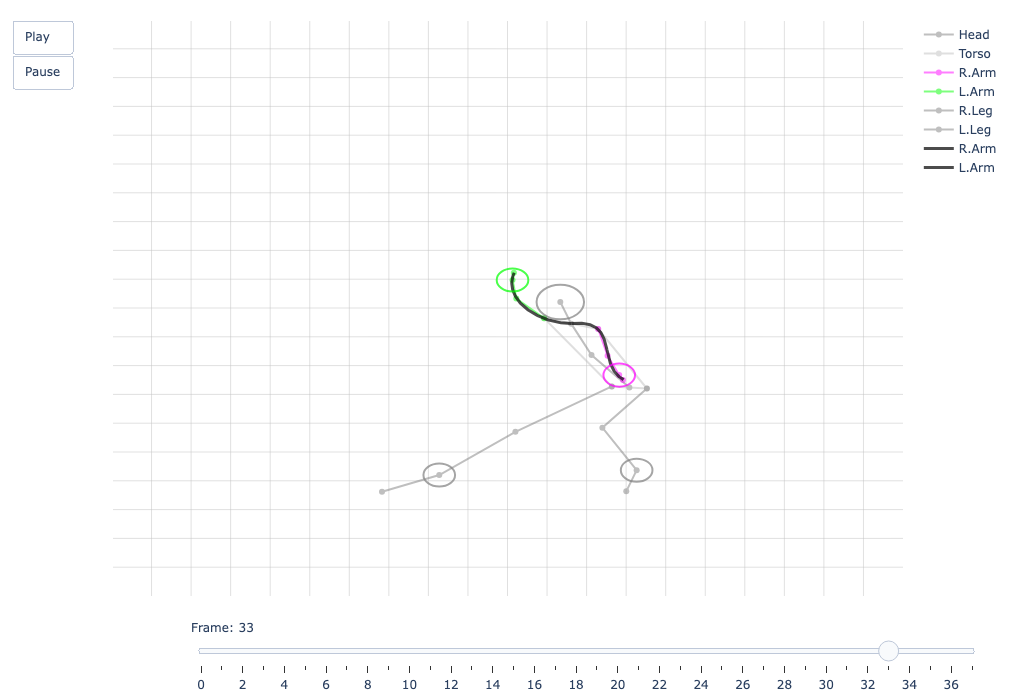

In [205]:
plotly_dynamic_pose_figure(upright, spine=False, right_arm=True, left_arm=True)

In [218]:
def plotly_pose_contact_points(data, idx, spine=True, right_arm=False, left_arm=False, right_leg=False, left_leg=False, save_image=False):
    threshold = 0.04
    row = data.iloc[idx]
    
    title = f"{row['pose_name']}" if 'pose_name' in row and pd.notna(row['pose_name']) else f"{row['image_filename'], row['pos_body']}"

    x_cols = sorted([col for col in data.columns if col.startswith('landmark_') and col.endswith('_x')])
    y_cols = sorted([col for col in data.columns if col.startswith('landmark_') and col.endswith('_y')])
    x = row[x_cols].values
    y = row[y_cols].values

    fig = go.Figure()

    # Plot points and connected pairs
    for i in range(11, 28):
        color = 'magenta' if i % 2 == 0 else 'lime'
        fig.add_trace(go.Scatter(x=[x[i]], y=[y[i]], mode='markers', marker=dict(color=color, size=5)))

    for i in range(11, 28):
        for j in range(i+1, 28):
            if np.hypot(x[i] - x[j], y[i] - y[j]) < threshold:
                fig.add_trace(go.Scatter(x=[x[i], x[j]], y=[y[i], y[j]], mode='lines', line=dict(color='blue', width=2)))

    Scolor  = 'black' if spine else 'gray'
    RAcolor = 'magenta' if right_arm else 'gray'
    LAcolor = 'lime' if left_arm else 'gray'
    RLcolor = 'magenta' if right_leg else 'gray'
    LLcolor = 'lime' if left_leg else 'gray'

    knees_x = (row['landmark_25_x'] + row['landmark_26_x'])/2
    knees_y = (row['landmark_25_y'] + row['landmark_26_y'])/2
    feet_x = (row['landmark_30_x'] + row['landmark_29_x'])/2
    feet_y = (row['landmark_30_y'] + row['landmark_29_y'])/2

    Sx = [row['head_x'], row['chest_x'], row['stomach_x'], row['hip_x']]
    Sy = [row['head_y'], row['chest_y'], row['stomach_y'], row['hip_y']]
    Tx = [row['landmark_11_x'], row['landmark_12_x'], row['landmark_24_x'],row['landmark_23_x'],row['landmark_11_x']]
    Ty = [row['landmark_11_y'], row['landmark_12_y'], row['landmark_24_y'],row['landmark_23_y'],row['landmark_11_y']]
    RAx = [row['landmark_12_x'], row['landmark_14_x'], row['landmark_16_x'], row['knuckles_right_x']]
    RAy = [row['landmark_12_y'], row['landmark_14_y'], row['landmark_16_y'], row['knuckles_right_y']]  
    LAx = [row['landmark_11_x'], row['landmark_13_x'], row['landmark_15_x'], row['knuckles_left_x']]
    LAy = [row['landmark_11_y'], row['landmark_13_y'], row['landmark_15_y'], row['knuckles_left_y']]  
    RLx = [row['landmark_24_x'], row['landmark_26_x'], row['landmark_28_x'],row['landmark_32_x']]
    RLy = [row['landmark_24_y'], row['landmark_26_y'], row['landmark_28_y'],row['landmark_32_y']]
    LLx = [row['landmark_23_x'], row['landmark_25_x'], row['landmark_27_x'],row['landmark_31_x']]
    LLy = [row['landmark_23_y'], row['landmark_25_y'], row['landmark_27_y'],row['landmark_31_y']]
    
    fig.add_trace(go.Scatter(x=Sx, y=Sy, mode='lines+markers', line=dict(color=Scolor, width=2),opacity=0.5, name='Head'))
    fig.add_trace(go.Scatter(x=Tx, y=Ty, mode='lines+markers', line=dict(color='silver', width=2),opacity=0.5, name='Torso'))
    fig.add_trace(go.Scatter(x=RAx, y=RAy, mode='lines+markers', line=dict(color=RAcolor, width=2),opacity=0.5, name='R. Arm'))
    fig.add_trace(go.Scatter(x=RLx, y=RLy, mode='lines+markers', line=dict(color=RLcolor, width=2),opacity=0.5, name='R. Leg'))
    fig.add_trace(go.Scatter(x=LAx, y=LAy, mode='lines+markers', line=dict(color=LAcolor, width=2),opacity=0.5, name='L. Arm'))
    fig.add_trace(go.Scatter(x=LLx, y=LLy, mode='lines+markers', line=dict(color=LLcolor, width=2),opacity=0.5, name='L. Leg'))
 
    fig.add_shape(type="circle", xref="x", yref="y", x0=row['head_x'] - 0.03, y0=row['head_y'] - 0.03,  x1=row['head_x'] + 0.03, y1=row['head_y'] + 0.03, line_color=Scolor, opacity=0.7)
    fig.add_shape(type="circle", xref="x", yref="y", x0=row['landmark_16_x'] - 0.02, y0=row['landmark_16_y'] - 0.02,  x1=row['landmark_16_x'] + 0.02, y1=row['landmark_16_y'] + 0.02, line_color=RAcolor, opacity=0.7)
    fig.add_shape(type="circle", xref="x", yref="y", x0=row['landmark_15_x'] - 0.02, y0=row['landmark_15_y'] - 0.02,  x1=row['landmark_15_x'] + 0.02, y1=row['landmark_15_y'] + 0.02, line_color=LAcolor, opacity=0.7)
    fig.add_shape(type="circle", xref="x", yref="y", x0=row['landmark_28_x'] - 0.02, y0=row['landmark_28_y'] - 0.02,  x1=row['landmark_28_x'] + 0.02, y1=row['landmark_28_y'] + 0.02, line_color=RLcolor, opacity=0.7)
    fig.add_shape(type="circle", xref="x", yref="y", x0=row['landmark_27_x'] - 0.02, y0=row['landmark_27_y'] - 0.02,  x1=row['landmark_27_x'] + 0.02, y1=row['landmark_27_y'] + 0.02, line_color=LLcolor, opacity=0.7)


    fig.update_xaxes(range=[0, 1], showgrid=True, gridwidth=0.5, gridcolor='silver', tickvals=np.arange(0, 1.05, 0.05), ticktext=['']*21)
    fig.update_yaxes(range=[1, 0], showgrid=True, gridwidth=0.5, gridcolor='silver', tickvals=np.arange(0, 1.05, 0.05), ticktext=['']*21)
    fig.update_layout(width=700, height=700, margin=dict(l=20, r=20, t=20, b=20), plot_bgcolor='white')
    fig.update_layout(title=title, showlegend=False)
    
    fig.show()

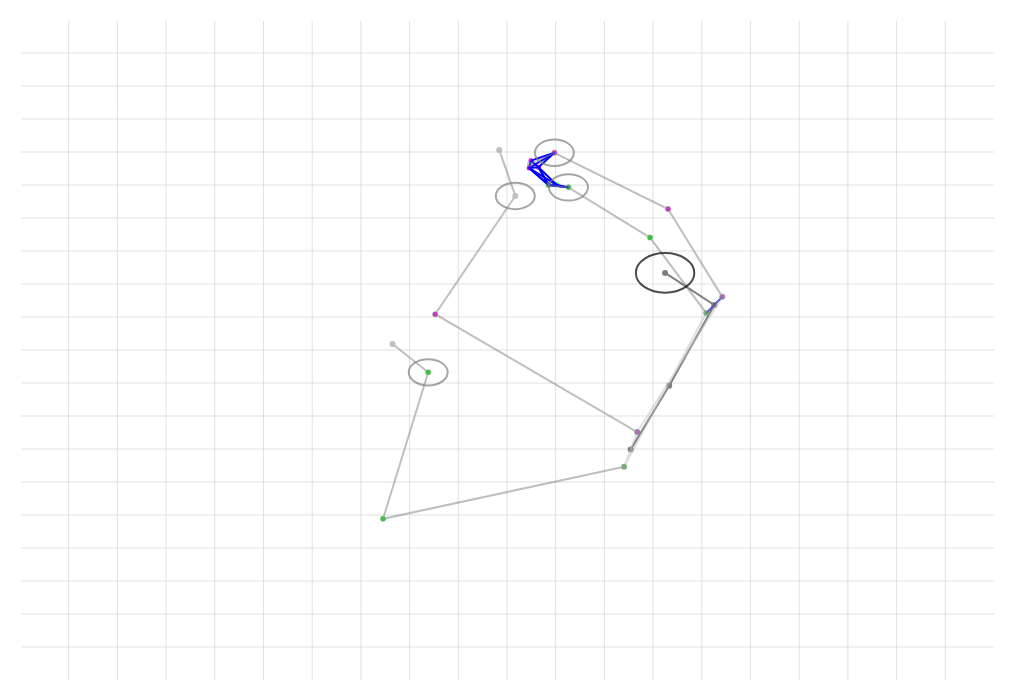

In [219]:
plotly_pose_contact_points(tricks, idx=498)

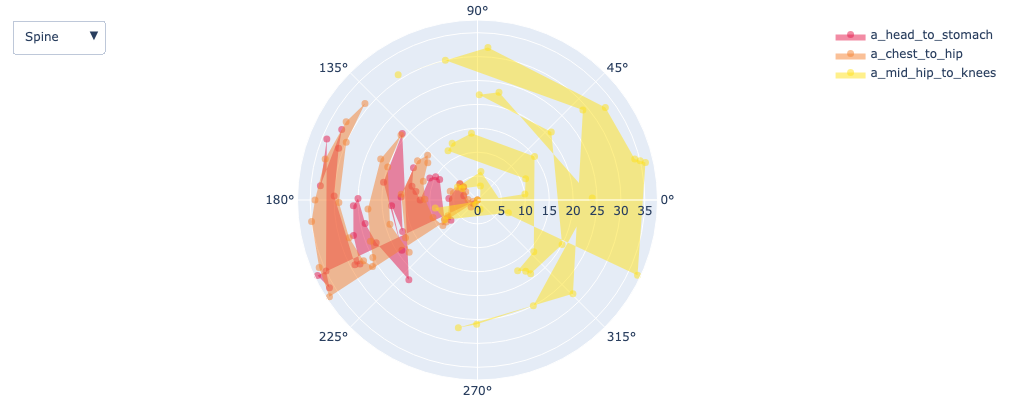

In [278]:
import plotly.graph_objects as go
import pandas as pd

def plot_polar_angles(data):
    colors = ['#e6194B', '#f58231', '#ffe119', '#bfef45', '#3cb44b', '#42d4f4', '#4363d8', '#911eb4', '#f032e6']
    a_cols = ['a_head_to_stomach', 'a_chest_to_hip', 'a_mid_hip_to_knees', 'a_rgt_shoulder_to_wrist', 'a_rgt_shoulder_to_knee', 'a_rgt_hip_to_foot', 'a_lft_shoulder_to_wrist', 'a_lft_shoulder_to_knee', 'a_lft_hip_to_foot']

    groups = {
        "Spine": ['a_head_to_stomach', 'a_chest_to_hip', 'a_mid_hip_to_knees'],
        "R.Arm": ['a_rgt_shoulder_to_wrist'],
        "L.Arm": ['a_lft_shoulder_to_wrist'],
        "R.Leg": ['a_rgt_shoulder_to_knee', 'a_rgt_hip_to_foot'],
        "L.Leg": ['a_lft_shoulder_to_knee', 'a_lft_hip_to_foot'],
    }

    fig = go.Figure()

    for idx, col in enumerate(a_cols):
        fig.add_trace(go.Scatterpolar(
            r=data.index,
            theta=data[col],
            mode="markers",
            fill="toself",
            name=col,
            marker=dict(size=5, color=colors[idx], line=dict(color=colors[idx], width=2), opacity=0.5)
        ))

    buttons = []
    for group_name, group_cols in groups.items():
        visibility = [col in group_cols for col in a_cols]
        buttons.append({
            "label": group_name,
            "method": "update",
            "args": [{"visible": visibility}]
        })

    buttons.append({
        "label": "Show All",
        "method": "update",
        "args": [{"visible": [True] * len(a_cols)}]
    })

    fig.update_layout(
        showlegend=True,
        updatemenus=[{"buttons": buttons, "direction": "down", "showactive": True}],
        plot_bgcolor='white',
        width=900, height=400, margin=dict(l=20, r=20, t=20, b=20)
    )

    fig.show()

data = pd.read_csv('data/ground_truth/processed/upright/pose_data.csv')
plot_polar_angles(data)